# **IMDB MOVIES - SENTIMENT ANALYSIS USING RNN**


> Parameshwari S - CB.SC.I5DAS18026



### 1. Data uploading

In [1]:
import numpy as np
import pandas as pd 
import re
import nltk 
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from keras.layers.core import Activation , Dense , Dropout
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [2]:
movie_reviews = pd.read_csv("/content/IMDB Dataset.csv",engine='python',encoding='utf-8')

### 2. Data exploring

In [3]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
movie_reviews.isnull().values.any()

False

In [5]:
movie_reviews.shape

(50000, 2)

In [6]:
movie_reviews['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

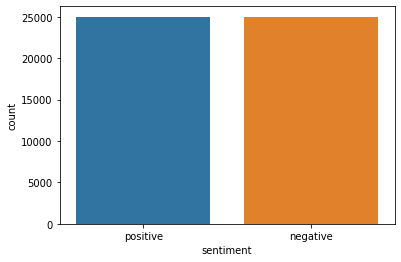

In [7]:
import seaborn as sns 
sns.countplot(x='sentiment',data=movie_reviews)

### 3. Data preprocessing

In [39]:
#Data Preprocessing and Cleaning 
def preprocess_text(sen):
  #Removing Html tags 
  sentence = remove_tags(sen)

  #Removing punctuations and numbers
  sentence = re.sub('[^a-zA-Z]',' ',sentence)

  #Single character removal 
  sentence = re.sub(r"\s+[a-zA-Z]\s"," ",sentence)

  #Removing Multiple Spaces 
  sentence = re.sub(r'\s+',' ', sentence)

  pattern = re.compile('<.*?>')
  sentence = re.sub(pattern,' ',sentence)

  return sentence

In [40]:
TAG_RE = re.compile(r'<[^>]+.>')

def remove_tags(text):
  return TAG_RE.sub('',text)

In [41]:
review = []
sentences  = list(movie_reviews['review'])
for sen in sentences:
  review.append(preprocess_text(sen))

In [42]:
review[4]

'Petter Mattei Love in the Time of Money is visually stunning film to watch Mr Mattei offers us vivid portrait about human relations This is movie that seems to be telling us what money power and success do to people in the different situations we encounter This being variation on the Arthur Schnitzler play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitat The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounter The acting is good under

In [43]:
converted = movie_reviews['sentiment']
converted = np.array(list(map(lambda x: 1 if x=='positive'  else 0,converted)))

### 4. Train-test split

In [44]:
review_train , review_test , converted_train , converted_test = train_test_split(review,converted,test_size = 0.20 , random_state= 0 )

In [45]:
print(len(review_train))
print(len(review_test))

40000
10000


### 5. Word embeddings

In [46]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review_train)

review_train = tokenizer.texts_to_sequences(review_train)
review_test = tokenizer.texts_to_sequences(review_test)


In [47]:
vocab_size = len(tokenizer.word_index)+1

maxlen = 100

review_train = pad_sequences(review_train , maxlen=maxlen , padding='post')
review_test = pad_sequences(review_test , maxlen=maxlen , padding='post')

In [48]:
!wget -c http://nlp.stanford.edu/data/glove.840B.300d.zip

--2021-11-26 06:38:31--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2021-11-26 06:38:31--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-11-26 06:38:31--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [49]:
import zipfile
with zipfile.ZipFile("/content/glove.840B.300d.zip", "r") as zipread:
  zipread.extractall("/content/")
  zipread.close

In [50]:
from numpy import zeros 
from numpy import asarray 

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt',encoding='utf8')

for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:],dtype = 'float32')
  embeddings_dictionary[word]=vector_dimensions
glove_file.close()


In [51]:
embedding_matrix = zeros((vocab_size , 100))
for word , index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector 

### 6. RNN Model 

In [64]:
from keras.layers import LSTM

model = Sequential()
embedding_layer  = Embedding(vocab_size,100,input_length=maxlen , trainable=False , weights = [embedding_matrix])

model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics =['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9228500   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,345,877
Trainable params: 117,377
Non-trainable params: 9,228,500
_________________________________________________________________


In [65]:
history = model.fit(review_train , converted_train , batch_size=128 , epochs=10 , verbose=1 , validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 74s 290ms/step - loss: 0.5500 - acc: 0.7109 - val_loss: 0.4467 - val_acc: 0.7952
Epoch 2/10
250/250 [==============================] - 71s 285ms/step - loss: 0.4411 - acc: 0.7944 - val_loss: 0.3954 - val_acc: 0.8186
Epoch 3/10
250/250 [==============================] - 71s 285ms/step - loss: 0.3935 - acc: 0.8207 - val_loss: 0.3881 - val_acc: 0.8276
Epoch 4/10
250/250 [==============================] - 71s 285ms/step - loss: 0.3674 - acc: 0.8349 - val_loss: 0.3636 - val_acc: 0.8394
Epoch 5/10
250/250 [==============================] - 71s 286ms/step - loss: 0.3448 - acc: 0.8466 - val_loss: 0.3681 - val_acc: 0.8335
Epoch 6/10
250/250 [==============================] - 72s 287ms/step - loss: 0.3295 - acc: 0.8558 - val_loss: 0.3421 - val_acc: 0.8468
Epoch 7/10
250/250 [==============================] - 71s 285ms/step - loss: 0.3088 - acc: 0.8665 - val_loss: 0.3611 - val_acc: 0.8401
Epoch 8/10
250/250 [==============================] - 7

### 7. Model Evaluation

In [66]:
score  = model.evaluate(review_test , converted_test , verbose= 1)
print("Test Score: ",score[0])
print("Test Accuracy: ",score[1])

313/313 [==============================] - 9s 30ms/step - loss: 0.3574 - acc: 0.8521
Test Score:  0.3573628067970276
Test Accuracy:  0.8521000146865845


In [67]:
instance = review[60]
print(instance)

What happened What we have here is basically solid and plausible premise and with decent and talented cast but somewhere the movie loses it Actually it never really got going There was little excitement when we find out that Angie is not really pregnant then find out that she is after all but that was it Steve Martin who is very talented person and usually brings lot to movie was dreadful and his entire character was not even close to being important to this movie other than to make it longer really would have liked to see more interactions between the main characters Kate and Angie and maybe try not for pure comedy which unfortunately it was not but maybe drama with comedic elements think if the movie did this it could have been very funny since both actresses are quite funny in their own ways and sitting here can think of numerous scenarios that would have been riot 


In [68]:
instance = tokenizer.texts_to_sequences(instance)

flat_list =[]

for sublist in instance:
  for item in sublist:
    flat_list.append(item)

flat_list=[flat_list]
instance = pad_sequences(flat_list , padding='post',maxlen=maxlen)

model.predict(instance)

array([[0.21861425]], dtype=float32)

### 8. Plotting the model performance

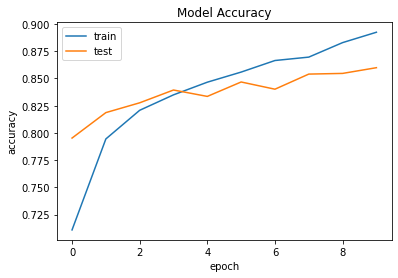

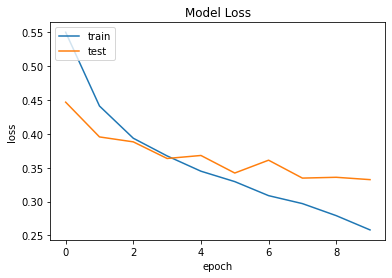

In [69]:
import matplotlib.pyplot as plt 

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


### 9. Testing the model

In [70]:
pred=np.where(model.predict(review_test))

In [71]:
samp=pad_sequences(tokenizer.texts_to_sequences(['I hate this movie.There is no story in it']),maxlen=maxlen)

In [72]:
np.where(model.predict(samp)>0.5,'Positive review','Negative review')[0][0]

'Negative review'

In [73]:
samp_2=pad_sequences(tokenizer.texts_to_sequences(['I love this movie.There is nice story in it']),maxlen=maxlen)

In [74]:
np.where(model.predict(samp_2)>0.5,'Positive review','Negative review')[0][0]

'Positive review'